## Import Data

In [1]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data


C:\Users\beatr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ImportError: Numba needs NumPy 1.21 or less

## Pré-processamento e preparação dos dados

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("C:/tmp/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv")

In [3]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [4]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fsID,8732.0,116033.493816,57991.017218,344.000000,69942.250000,118279.000000,166942.000000,209992.000000
start,8732.0,38.645409,74.292126,0.000000,3.000000,10.376492,35.131372,600.125356
end,8732.0,42.253312,74.369669,0.105962,6.839398,14.000000,38.866979,604.125356
salience,8732.0,1.347000,0.476043,1.000000,1.000000,1.000000,2.000000,2.000000
fold,8732.0,5.385937,2.846820,1.000000,3.000000,5.000000,8.000000,10.000000
classID,8732.0,4.592877,2.894544,0.000000,2.000000,4.000000,7.000000,9.000000


In [7]:
#classes nao balanceadas
df['class'].value_counts()


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

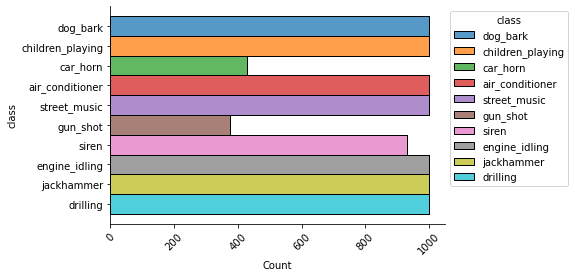

In [8]:
#ver graficamente
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
ax = sns.histplot(y='class',data = df, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45);
sns.despine()
plt.show()

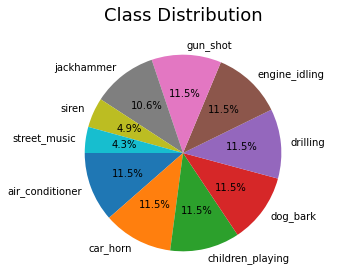

In [9]:
class_dict = df['class'].value_counts(normalize=True)
classes = list(np.unique(df['class']))
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08, fontsize=18)
ax.pie(class_dict, labels=classes, autopct='%1.1f%%', shadow=False, startangle=180)
ax.axis('equal')
plt.savefig("distribution_class")
plt.show(block=False)

In [29]:
dif1=df['end'].iloc[0]-df['start'].iloc[0]
dif2=df['end'].iloc[1]-df['start'].iloc[1]
print(dif1)
print(dif2)


0.317551
4.0


### Verificação da existência de diferentes durações

In [15]:
for index, row in df.iterrows():
    difference = row['end'] - row['start']
    print(f'Difference for row {index}: {difference}')

Difference for row 0: 0.317551
Difference for row 1: 4.0
Difference for row 2: 4.0
Difference for row 3: 4.0
Difference for row 4: 4.0
Difference for row 5: 4.0
Difference for row 6: 4.0
Difference for row 7: 4.0
Difference for row 8: 4.0
Difference for row 9: 0.6485250000000002
Difference for row 10: 1.0538530000000002
Difference for row 11: 0.4053280000000008
Difference for row 12: 1.6213109999999986
Difference for row 13: 1.8645080000000007
Difference for row 14: 4.0
Difference for row 15: 4.0
Difference for row 16: 4.0
Difference for row 17: 4.0
Difference for row 18: 4.0
Difference for row 19: 4.0
Difference for row 20: 4.0
Difference for row 21: 4.0
Difference for row 22: 4.0
Difference for row 23: 4.0
Difference for row 24: 4.0
Difference for row 25: 4.0
Difference for row 26: 4.0
Difference for row 27: 4.0
Difference for row 28: 4.0
Difference for row 29: 4.0
Difference for row 30: 4.0
Difference for row 31: 4.0
Difference for row 32: 4.0
Difference for row 33: 4.0
Difference f

Difference for row 1412: 4.000000000000014
Difference for row 1413: 4.000000000000014
Difference for row 1414: 4.000000000000014
Difference for row 1415: 4.000000000000014
Difference for row 1416: 4.000000000000014
Difference for row 1417: 4.000000000000014
Difference for row 1418: 4.000000000000014
Difference for row 1419: 4.000000000000014
Difference for row 1420: 1.4753890000000003
Difference for row 1421: 1.4512010000000002
Difference for row 1422: 2.6121630000000025
Difference for row 1423: 2.3944829999999975
Difference for row 1424: 2.6847240000000028
Difference for row 1425: 0.5562939999999976
Difference for row 1426: 2.5879770000000004
Difference for row 1427: 1.5237619999999996
Difference for row 1428: 1.789816
Difference for row 1429: 2.2977360000000004
Difference for row 1430: 2.200990000000001
Difference for row 1431: 2.0558689999999977
Difference for row 1432: 1.8623760000000011
Difference for row 1433: 1.9833089999999984
Difference for row 1434: 1.280285
Difference for ro

Difference for row 2562: 3.999999999999999
Difference for row 2563: 4.0
Difference for row 2564: 4.0
Difference for row 2565: 4.0
Difference for row 2566: 4.0
Difference for row 2567: 4.0
Difference for row 2568: 4.0
Difference for row 2569: 4.0
Difference for row 2570: 4.0
Difference for row 2571: 4.0
Difference for row 2572: 1.886562
Difference for row 2573: 1.737542
Difference for row 2574: 2.357464
Difference for row 2575: 1.184218
Difference for row 2576: 4.0
Difference for row 2577: 4.0
Difference for row 2578: 4.0
Difference for row 2579: 4.0
Difference for row 2580: 4.0
Difference for row 2581: 4.0
Difference for row 2582: 4.0
Difference for row 2583: 1.898152
Difference for row 2584: 2.0423150000000003
Difference for row 2585: 1.5617709999999994
Difference for row 2586: 1.7539890000000007
Difference for row 2587: 2.3146240000000002
Difference for row 2588: 2.4427699999999994
Difference for row 2589: 2.018288
Difference for row 2590: 0.597821
Difference for row 2591: 0.576844
D

Difference for row 3873: 4.0
Difference for row 3874: 4.0
Difference for row 3875: 4.0
Difference for row 3876: 4.0
Difference for row 3877: 4.0
Difference for row 3878: 4.0
Difference for row 3879: 4.0
Difference for row 3880: 4.0
Difference for row 3881: 4.0
Difference for row 3882: 4.0
Difference for row 3883: 4.0
Difference for row 3884: 4.0
Difference for row 3885: 4.0
Difference for row 3886: 4.0
Difference for row 3887: 4.0
Difference for row 3888: 4.0
Difference for row 3889: 4.0
Difference for row 3890: 4.0
Difference for row 3891: 4.0
Difference for row 3892: 4.0
Difference for row 3893: 4.0
Difference for row 3894: 4.0
Difference for row 3895: 4.0
Difference for row 3896: 4.0
Difference for row 3897: 4.0
Difference for row 3898: 4.0
Difference for row 3899: 4.0
Difference for row 3900: 4.0
Difference for row 3901: 4.0
Difference for row 3902: 4.0
Difference for row 3903: 4.0
Difference for row 3904: 4.0
Difference for row 3905: 4.0
Difference for row 3906: 4.0
Difference for

Difference for row 5373: 4.0
Difference for row 5374: 4.0
Difference for row 5375: 4.0
Difference for row 5376: 4.0
Difference for row 5377: 4.0
Difference for row 5378: 1.3356980000000007
Difference for row 5379: 4.0
Difference for row 5380: 4.0
Difference for row 5381: 4.0
Difference for row 5382: 4.0
Difference for row 5383: 4.0
Difference for row 5384: 4.0
Difference for row 5385: 4.0
Difference for row 5386: 4.0
Difference for row 5387: 4.0
Difference for row 5388: 4.0
Difference for row 5389: 4.0
Difference for row 5390: 4.0
Difference for row 5391: 4.0
Difference for row 5392: 4.0
Difference for row 5393: 4.0
Difference for row 5394: 4.0
Difference for row 5395: 4.0
Difference for row 5396: 4.0
Difference for row 5397: 4.0
Difference for row 5398: 4.0
Difference for row 5399: 4.0
Difference for row 5400: 4.0
Difference for row 5401: 4.0
Difference for row 5402: 4.0
Difference for row 5403: 4.0
Difference for row 5404: 4.0
Difference for row 5405: 4.0
Difference for row 5406: 4.0

Difference for row 6809: 4.0
Difference for row 6810: 4.0
Difference for row 6811: 4.0
Difference for row 6812: 4.0
Difference for row 6813: 3.999999999999999
Difference for row 6814: 4.0
Difference for row 6815: 4.0
Difference for row 6816: 4.0
Difference for row 6817: 4.0
Difference for row 6818: 4.0
Difference for row 6819: 4.0
Difference for row 6820: 4.0000000000000036
Difference for row 6821: 4.0
Difference for row 6822: 4.0
Difference for row 6823: 4.0
Difference for row 6824: 4.0
Difference for row 6825: 4.0
Difference for row 6826: 4.0
Difference for row 6827: 4.0
Difference for row 6828: 4.0
Difference for row 6829: 4.0
Difference for row 6830: 4.0
Difference for row 6831: 4.0
Difference for row 6832: 4.0
Difference for row 6833: 4.0
Difference for row 6834: 4.0
Difference for row 6835: 4.0
Difference for row 6836: 4.0
Difference for row 6837: 4.0
Difference for row 6838: 4.0
Difference for row 6839: 4.0
Difference for row 6840: 4.0
Difference for row 6841: 4.0
Difference for

Difference for row 7872: 4.0
Difference for row 7873: 4.0
Difference for row 7874: 4.0
Difference for row 7875: 4.0
Difference for row 7876: 4.0
Difference for row 7877: 4.0
Difference for row 7878: 4.0
Difference for row 7879: 4.0
Difference for row 7880: 4.0
Difference for row 7881: 4.0
Difference for row 7882: 4.0
Difference for row 7883: 4.0
Difference for row 7884: 4.0
Difference for row 7885: 4.0
Difference for row 7886: 4.0
Difference for row 7887: 4.0
Difference for row 7888: 4.0
Difference for row 7889: 4.0
Difference for row 7890: 4.0
Difference for row 7891: 4.0
Difference for row 7892: 4.0
Difference for row 7893: 4.0
Difference for row 7894: 4.0
Difference for row 7895: 4.0
Difference for row 7896: 4.0
Difference for row 7897: 4.0
Difference for row 7898: 4.0
Difference for row 7899: 4.0
Difference for row 7900: 4.0
Difference for row 7901: 4.0
Difference for row 7902: 4.0
Difference for row 7903: 4.0
Difference for row 7904: 4.0
Difference for row 7905: 4.0
Difference for

In [17]:
count=0
for index, row in df.iterrows():
    difference = row['end'] - row['start']
    if difference!=4:
        count+=1
print(count)

1868


**1868 aúdios têm uma duração diferente de 4 segundos.**

In [18]:
#1 audio fold1
#sr = sampling rate -> numero de amostras do som por segundo
audiodata, sr=librosa.load('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')
audiodata


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0969747e-05,
       2.2333768e-05, 0.0000000e+00], dtype=float32)

In [19]:
sr

22050

In [20]:
import IPython.display as ipd
ipd.Audio('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')


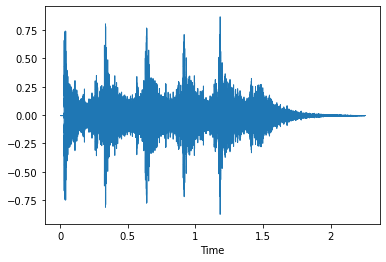

In [21]:
librosa.display.waveshow(audiodata, sr=sr)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

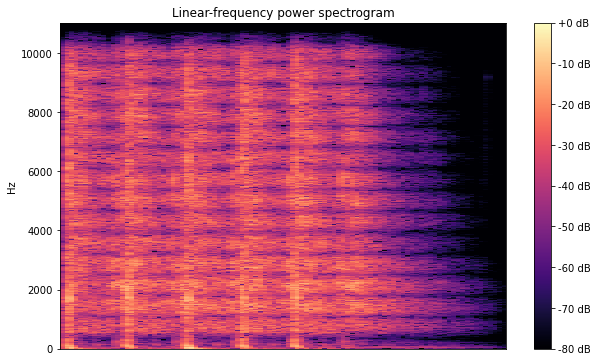

In [22]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [26]:
audio_file_path ='C:/tmp/sound_datasets/urbansound8k/audio/fold2/4201-3-0-0.wav'

audiodata2,sr2=librosa.load(audio_file_path)

ipd.Audio(audio_file_path)



In [27]:
sr2

22050

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

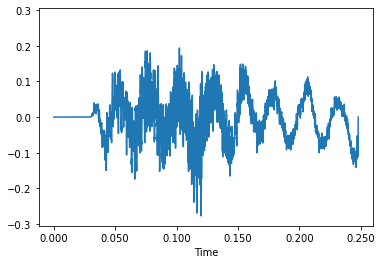

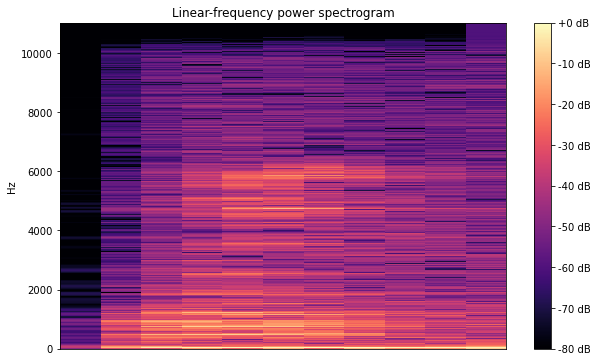

In [17]:
librosa.display.waveshow(audiodata2, sr=sr2)

D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata2)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

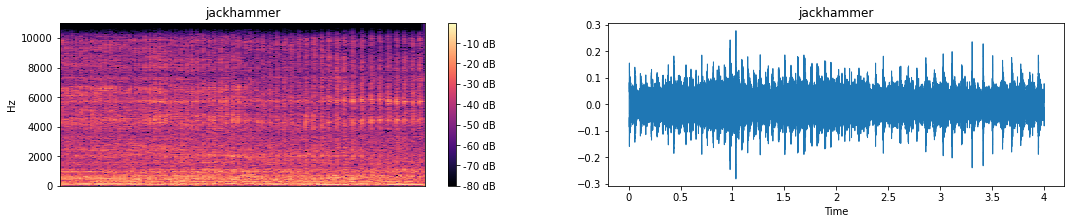

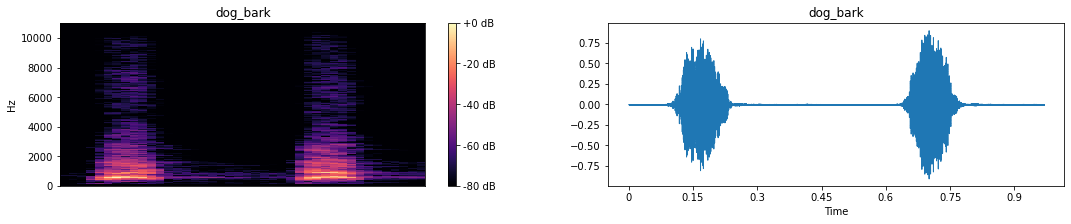

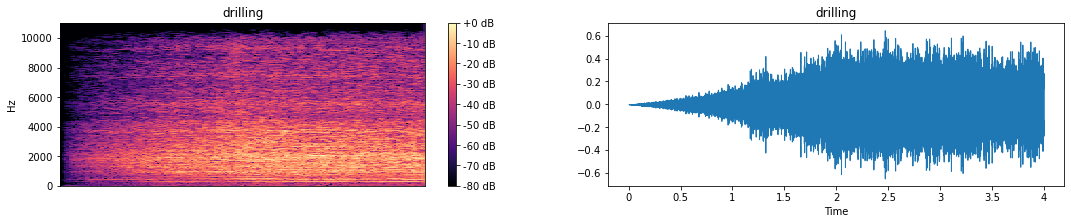

In [18]:
for i in range(192, 197, 2):
    audio_file_path = 'C:/tmp/sound_datasets/urbansound8k/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    
    audiodata3, sr3 = librosa.load(audio_file_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata3)), ref=np.max)
    
    plt.figure(figsize=(18, 3))
    
    plt.subplot(1, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(df["class"][i])
    
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(audiodata3, sr=sr3)
    plt.title(df["class"][i])

### Verificação da existência de diferentes sample rates

In [28]:
sr_ = set()

from tqdm import tqdm

dir="C:/tmp/sound_datasets/urbansound8k/audio/"


for index,row in tqdm(df.iterrows()):
    audio_path=dir+'fold'+ str(row['fold']) + '/' + row['slice_file_name']
    audiodata, sr = librosa.load(audio_path)
    sr_.add(sr)
    
if len(sr_) > 1:
    print("Existem taxas de amostragem diferentes nos arquivos de áudio:")
    for sr in taxas_amostragem_encontradas:
        print(f"- {sr} Hz")
else:
    print("Todos os arquivos de áudio têm a mesma taxa de amostragem.")
    

8732it [16:51,  8.63it/s]

Todos os arquivos de áudio têm a mesma taxa de amostragem.


**Observações:** _Existem áudios com diferentes durações, pelo que iremos preencher os áudios mais curtos._ 

### Extração das Features


In [30]:
def extracao_features(audio_file, target_duration):
    data, sr =librosa.load(audio_file, res_type='kaiser_fast')
    
    #uniforme duracao
    current_duration=len(data)/sr
    if current_duration < target_duration:
        #calcula nr de zeros
        zeros=int((target_duration - current_duration))*sr
        new_data=np.pad(data,(0,zeros),'constant')#adiciona os zeros no array
    else: new_data=data
    
    mfccs_file=librosa.feature.mfcc(y=new_data, sr=sr,n_mfcc=40)
    return mfccs_file
    

In [31]:
from tqdm import tqdm

dir="C:/tmp/sound_datasets/urbansound8k/audio/"
mfccs_audio_data=[]
duration=4.0

for index,row in tqdm(df.iterrows()):
    audio_path=dir+'fold'+ str(row['fold']) + '/' + row['slice_file_name']
    class_label = row['class']
    mfccs_audio = extracao_features(audio_path, duration)
    mfccs_audio = np.mean(mfccs_audio.T,axis=0)
    mfccs_audio_data.append([mfccs_audio, class_label])

8732it [06:43, 21.63it/s]


In [32]:
df_features=pd.DataFrame(mfccs_audio_data, columns=['features','class'])

In [33]:
df_features.to_csv("./featuredf.csv")

In [60]:
#df_features=pd.read_csv("./featuredf.csv")

In [43]:
df_features

,features,class
0,"[-585.50775, 7.4916563, -13.415623, -5.647882,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing
...,...,...
8727,"[-398.5845, 135.53496, -50.725018, 35.855907, ...",car_horn
8728,"[-495.8754, 59.84861, -31.213297, 35.548153, -...",car_horn
8729,"[-303.88824, 111.35945, -45.941563, 35.877018,...",car_horn
8730,"[-489.54172, 90.76143, -39.33232, 25.102507, -...",car_horn


In [44]:
X=np.array(df_features['features'].tolist())
y = np.array(df_features['class'].tolist())

In [45]:
print(X.shape)

(8732, 40)


In [47]:
print(y.shape)

(8732,)


### Normalização dos Dados

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_nom = scaler.fit_transform(X)

In [51]:
features=pd.DataFrame(features_nom)
target=pd.DataFrame(y, columns = ['class'])

In [52]:
df2 = pd.concat([features, target], axis = 1)

In [53]:
df2

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,class
0,-1.974916,-1.863709,0.382633,-1.188652,0.643977,-1.124605,0.458024,-0.806025,0.922027,-0.878885,...,0.135742,0.292651,-0.066017,0.140228,-0.133992,0.445073,0.074132,0.275812,0.010295,dog_bark
1,-0.971123,0.070985,-0.913531,1.996188,0.792984,0.253775,0.703602,0.002329,0.711225,0.416075,...,0.444600,0.047155,-0.082903,0.342518,-0.055689,-0.235660,0.260281,0.135699,0.124085,children_playing
2,-1.186875,0.299758,-0.703578,1.572104,0.776616,0.708508,1.225000,-0.149765,0.787210,0.259045,...,-0.455506,-0.761507,-0.776053,-0.146324,-0.670478,-0.175522,0.673009,0.872329,-0.263295,children_playing
3,-0.907700,-0.074846,-0.339664,1.621339,0.877921,0.079933,0.764964,-0.279941,0.629789,0.132567,...,0.249083,0.533673,0.220251,-0.405644,0.377380,-0.166677,-0.233209,-0.374957,-0.327117,children_playing
4,-1.111082,0.153514,-0.896557,1.969244,0.961810,0.799648,0.759062,-0.049814,1.153216,0.191775,...,-0.457161,0.208332,0.466543,-0.333875,-0.014355,0.074914,0.673675,0.681626,0.013297,children_playing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-0.812455,0.568561,-0.841527,0.798684,0.241035,0.095709,1.136420,0.561696,0.344187,-0.617167,...,0.644864,1.400362,0.825519,0.322402,0.521358,-1.205573,-1.778019,-0.495348,1.111699,car_horn
8728,-1.417500,-0.869153,-0.201327,0.783948,-0.716963,-1.180903,1.558327,-1.006818,-0.104970,0.657542,...,0.486527,0.322302,1.248287,1.379901,0.136083,-0.049792,0.606566,-0.168597,-0.554835,car_horn
8729,-0.223546,0.109331,-0.684577,0.799695,0.168364,-0.080567,0.753318,-0.064507,0.148276,-0.387506,...,-0.085077,1.372838,1.962040,1.444330,0.654413,-0.967298,-0.693713,1.207853,2.098068,car_horn
8730,-1.378111,-0.281942,-0.467721,0.283776,-0.166230,-0.606021,1.294885,-0.382965,0.235727,0.493819,...,0.393298,1.362420,1.227852,0.716208,0.670320,-0.764442,-1.401054,-0.070759,1.127675,car_horn


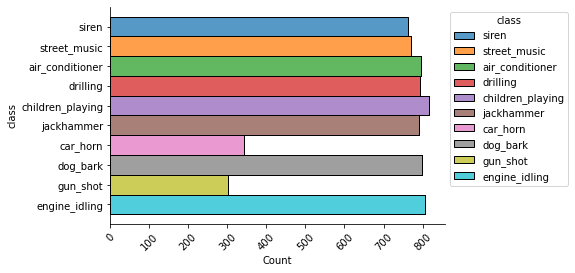

In [55]:
from sklearn.model_selection import train_test_split
X2 = df2.drop('class', axis=1)  
y2 = df2['class']

#desbalanceamento
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

df_train = pd.DataFrame(data=X_train, columns=df2.columns[:-1]) 


df_train['class'] = y_train

#gráfico
ax = sns.histplot(y='class', data=df_train, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
sns.despine()
plt.show()


In [56]:
#distribuição das classes
class_dict = y_train.value_counts(normalize=True)
print(class_dict)

children_playing    0.116965
engine_idling       0.115533
dog_bark            0.114388
air_conditioner     0.114102
drilling            0.113672
jackhammer          0.113386
street_music        0.110236
siren               0.109377
car_horn            0.049105
gun_shot            0.043236
Name: class, dtype: float64


Fazer oversampling para as classes minoritarias, gun_shot e car_horn, e depois utilizar pesos na rede